In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
bfriday_data = pd.read_csv('/content/BlackFriday.csv')

In [3]:
bfriday_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Unnamed: 10,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
bfriday_data.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            28234
Unnamed: 10                   62855
Purchase                          0
dtype: int64

In [5]:
bfriday_data.shape

(90354, 12)

In [7]:
bfriday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90354 entries, 0 to 90353
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     90354 non-null  int64  
 1   Product_ID                  90354 non-null  object 
 2   Gender                      90354 non-null  object 
 3   Age                         90354 non-null  object 
 4   Occupation                  90354 non-null  int64  
 5   City_Category               90354 non-null  object 
 6   Stay_In_Current_City_Years  90354 non-null  object 
 7   Marital_Status              90354 non-null  int64  
 8   Product_Category_1          90354 non-null  int64  
 9   Product_Category_2          62120 non-null  float64
 10  Unnamed: 10                 27499 non-null  float64
 11  Purchase                    90354 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 8.3+ MB


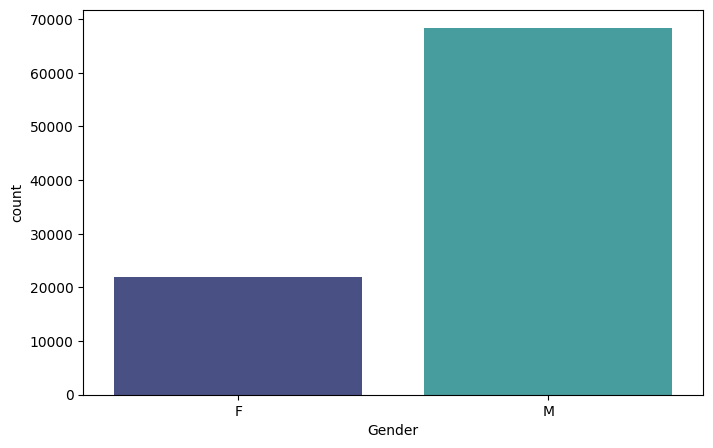

In [11]:
#visualization
plt.figure(figsize=(8,5))
sns.countplot(data=bfriday_data, x='Gender', palette='mako')
plt.show()

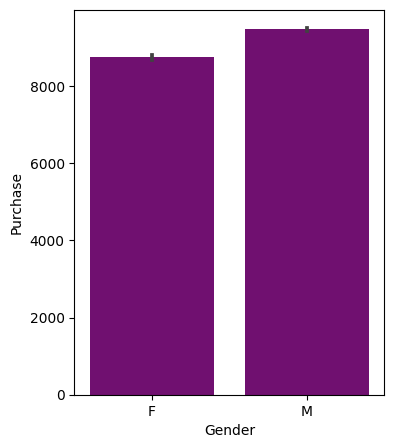

In [21]:
#purchase status
plt.figure(figsize=(4,5))
sns.barplot(data=bfriday_data, x='Gender', y='Purchase', color='purple')
plt.show()

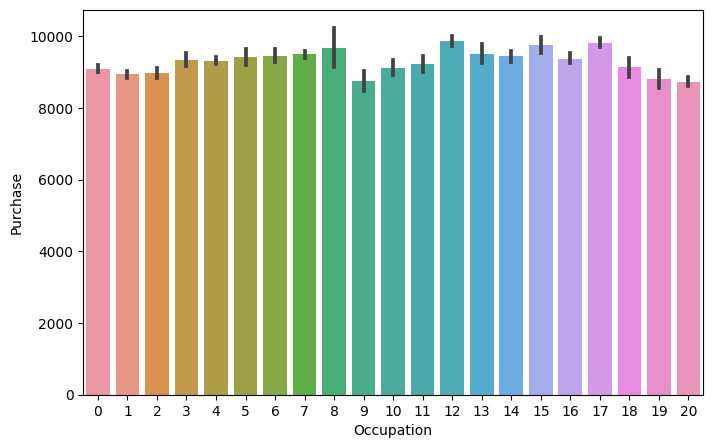

In [22]:
#occupation status
plt.figure(figsize=(8,5))
sns.barplot(data=bfriday_data, x='Occupation', y='Purchase') #occupation has direct impact on purchase
plt.show()

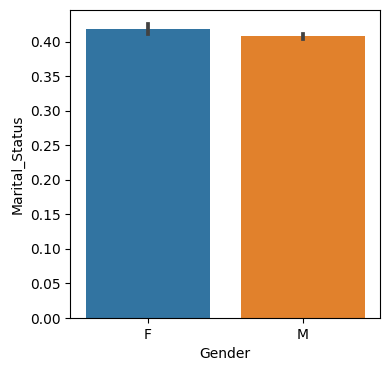

In [15]:
#marital status
plt.figure(figsize=(4,4))
sns.barplot(data=bfriday_data, x='Gender', y='Marital_Status')
plt.show()

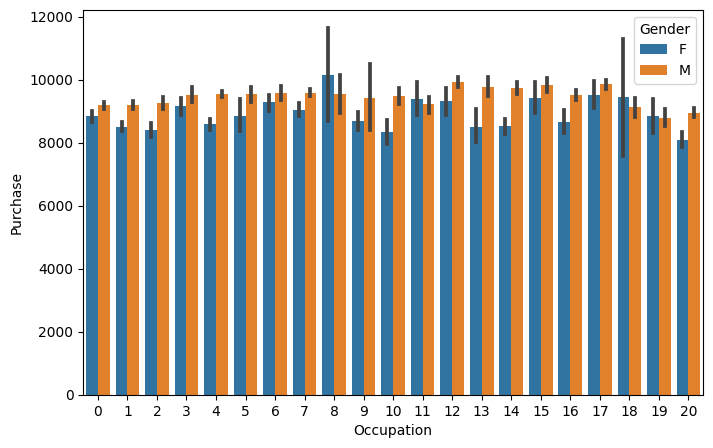

In [23]:
#comparing male and female genders with hue
plt.figure(figsize=(8,5))
sns.barplot(data=bfriday_data, x='Occupation', y='Purchase', hue='Gender')
plt.show()

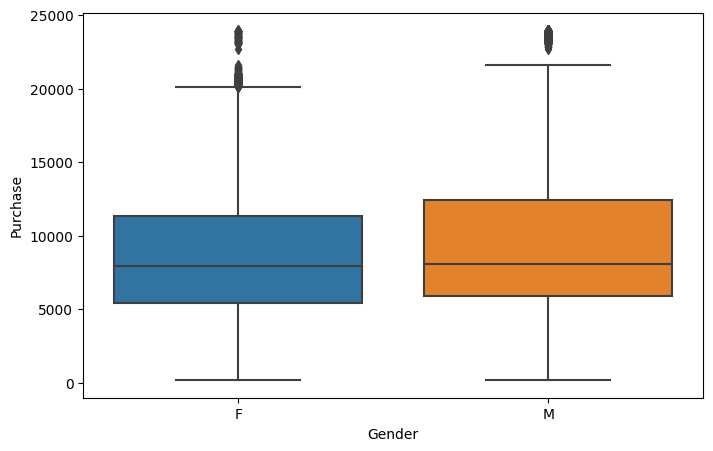

In [24]:
#outlier detection
#checking presence of ouutlier
plt.figure(figsize=(8,5))
sns.boxplot(data=bfriday_data, x='Gender', y='Purchase')
plt.show()

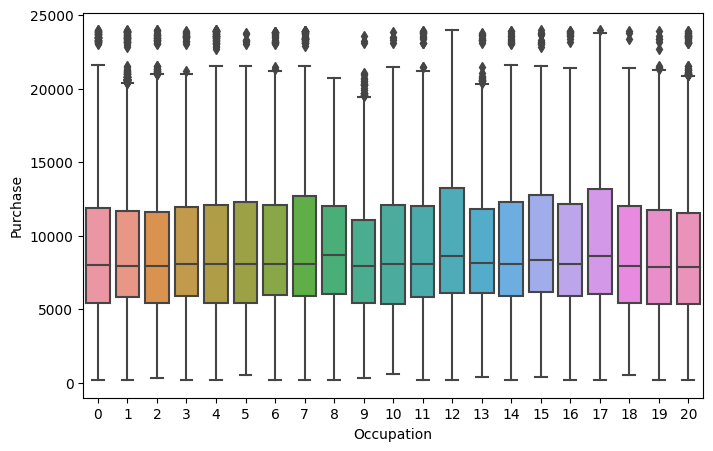

In [25]:
#occupation outlier
plt.figure(figsize=(8,5))
sns.boxplot(data=bfriday_data, x='Occupation', y='Purchase')
plt.show()

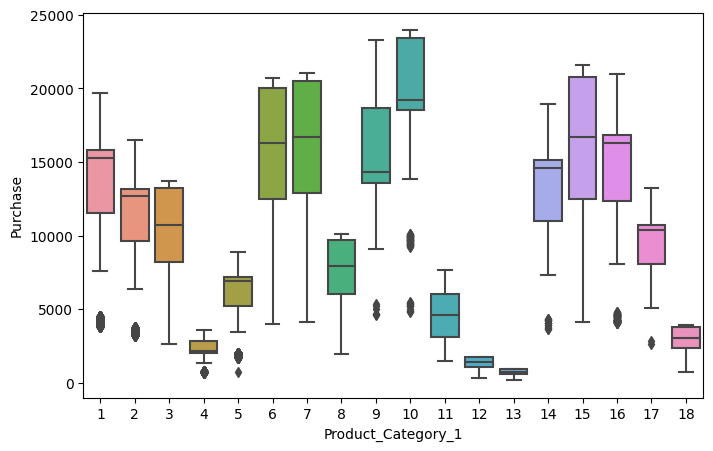

In [26]:
#product category outlier
plt.figure(figsize=(8,5))
sns.boxplot(data=bfriday_data, x='Product_Category_1', y='Purchase')
plt.show()

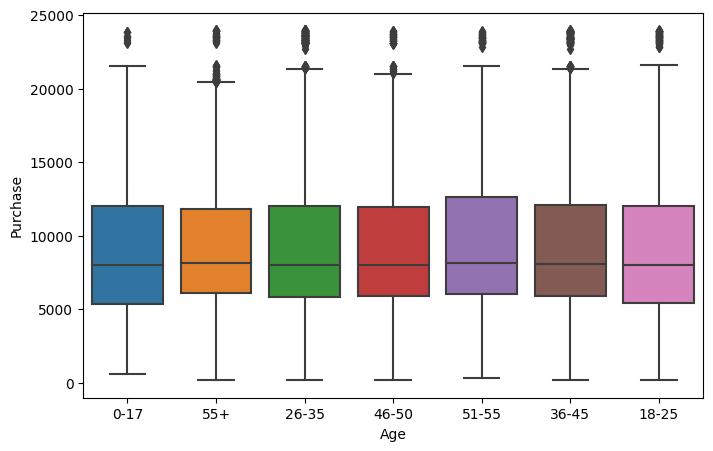

In [27]:
#purchase outlier
plt.figure(figsize=(8,5))
sns.boxplot(data=bfriday_data, x='Age', y='Purchase')
plt.show()

In [31]:
#Data prepossing
bfriday_data['Product_Category_2'].fillna(bfriday_data['Product_Category_2'].mean(),inplace=True)
bfriday_data['Product_Category_1'].mode()

0    5
Name: Product_Category_1, dtype: int64

In [30]:
bfriday_data['Product_Category_1'].mode()[0]

5

In [32]:
bfriday_data = bfriday_data.drop('Product_Category_2', axis=1)
#encode categorical column
bfriday_data['Product_ID'].value_counts()
bfriday_data['Product_Category_1'].value_counts()


5     25127
1     23077
8     19018
11     4089
2      3924
3      3359
6      3303
4      1926
16     1566
15     1026
13      876
10      839
12      641
7       632
18      504
14      259
17      108
9        80
Name: Product_Category_1, dtype: int64

In [33]:
# Select relevant features
features = ['Product_ID', 'Occupation', 'Age', 'Marital_Status']
bfriday_data.drop('Age', axis=1, inplace=True)
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()
bfriday_data['Product_ID'] = label_encoder.fit_transform(bfriday_data['Product_ID'])
bfriday_data['Gender'] = label_encoder.fit_transform(bfriday_data['Gender'])
bfriday_data['City_Category'] = label_encoder.fit_transform(bfriday_data['City_Category'])
bfriday_data['Stay_In_Current_City_Years'] = label_encoder.fit_transform(bfriday_data['Stay_In_Current_City_Years'])

bfriday_data

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Unnamed: 10,Purchase
0,1000001,611,0,10,0,2,0,3,NaN,8370
1,1000001,2164,0,10,0,2,0,1,14.0,15200
2,1000001,761,0,10,0,2,0,12,NaN,1422
3,1000001,737,0,10,0,2,0,12,NaN,1057
4,1000002,2500,1,16,2,4,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
90349,1001899,2523,0,6,0,1,1,8,NaN,7789
90350,1001899,1499,0,6,0,1,1,8,NaN,8047
90351,1001899,967,0,6,0,1,1,2,NaN,13067
90352,1001899,1322,0,6,0,1,1,8,NaN,6007


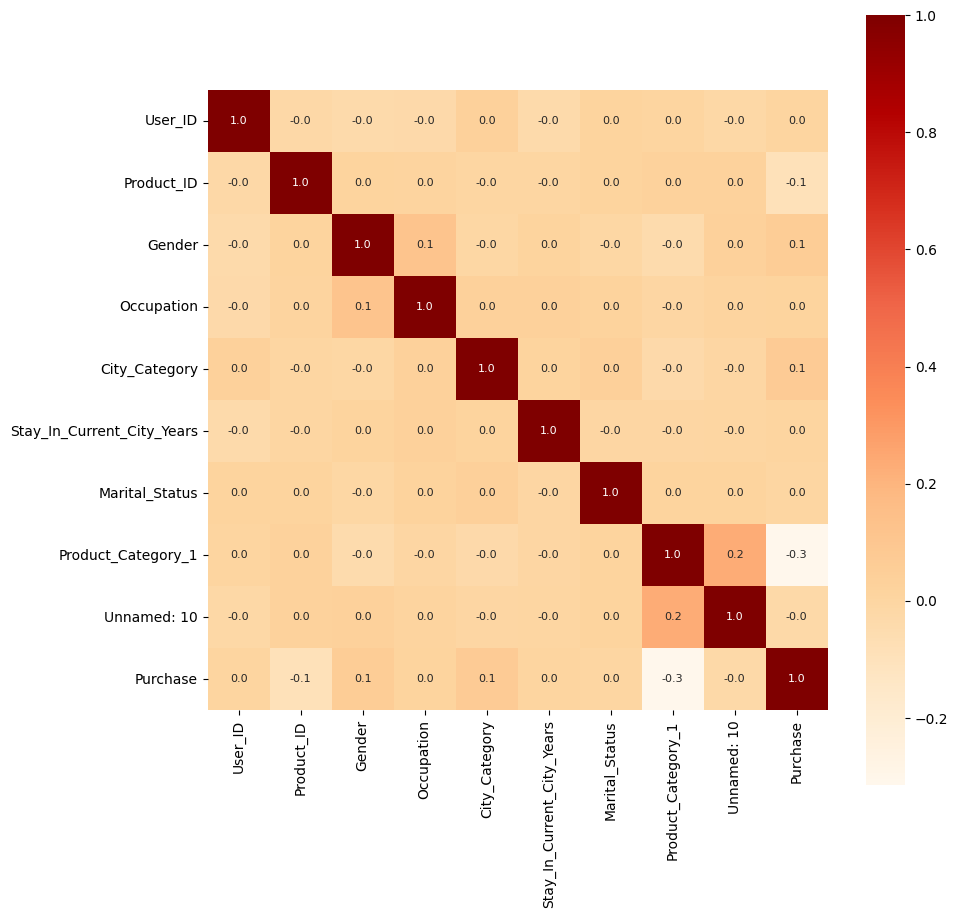

In [51]:
#Correlation betn all the column and quality column
correlation=bfriday_data.corr()

#Positive Correlation
#Negative Correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 8},cmap='OrRd')
plt.show()

In [43]:
#separate the data and label
X= bfriday_data.drop('Purchase',axis=1)
print(X)

#label Binarization
Y = bfriday_data['Purchase'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)#Train & Test Split


       User_ID  Product_ID  Gender  Occupation  City_Category  \
0      1000001         611       0          10              0   
1      1000001        2164       0          10              0   
2      1000001         761       0          10              0   
3      1000001         737       0          10              0   
4      1000002        2500       1          16              2   
...        ...         ...     ...         ...            ...   
90349  1001899        2523       0           6              0   
90350  1001899        1499       0           6              0   
90351  1001899         967       0           6              0   
90352  1001899        1322       0           6              0   
90353  1001899         778       0           6              0   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape,Y_train.shape,Y_test.shape)

(90354,) (72283,) (18071,)


In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [47]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0
